In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
from cloveFunctions import *

In [10]:
# cloves = pd.read_csv('brca_1M_clove.tab.gz', sep='\t', compression='gzip', index_col=0)
counts = pd.read_csv('data/brca_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col=0)

### show relationship between exp and clDEG counts

In [11]:
exp = pd.read_csv('data/brca_exp.tab.gz', sep='\t', compression='gzip', index_col=0)

In [22]:
merged = counts[[samp]].merge(exp[[samp]], left_index=True, right_index=True)

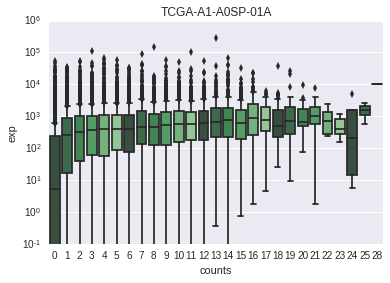

In [14]:
%matplotlib inline
samp = 'TCGA-A1-A0SP-01A'  # from random sample of sample column headings
merged = counts[[samp]].merge(exp[[samp]], left_index=True, right_index=True)
merged.columns = ['counts', 'exp']
ax = sns.boxplot(x='counts', y='exp', data=merged, palette=sns.color_palette("Greens_d"))
ax.set(yscale="log")
plt.title(samp)

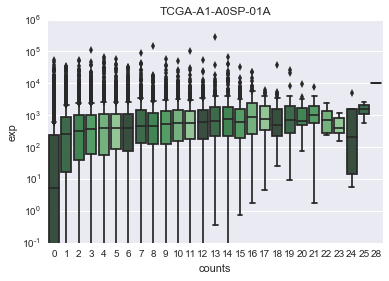

In [61]:
%matplotlib inline
samp = 'TCGA-A1-A0SP-01A'  # from random sample of sample column headings
merged = counts[[samp]].merge(exp[[samp]], left_index=True, right_index=True)
merged.columns = ['counts', 'exp']
ax = sns.boxplot(x='counts', y='exp', data=merged, palette=sns.color_palette("Greens_d"))
ax.set(yscale="log")
plt.title(samp)

In [64]:
for sample in counts.columns:
    mdf = counts[[samp]].merge(exp[[samp]], left_index=True, right_index=True)
    merged = pd.concat([merged, mdf])

merged.shape

(21875634, 4)

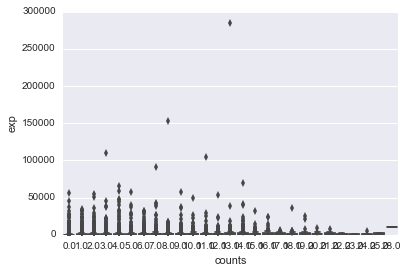

In [65]:
sns.boxplot(x='counts', y='exp', data=merged)

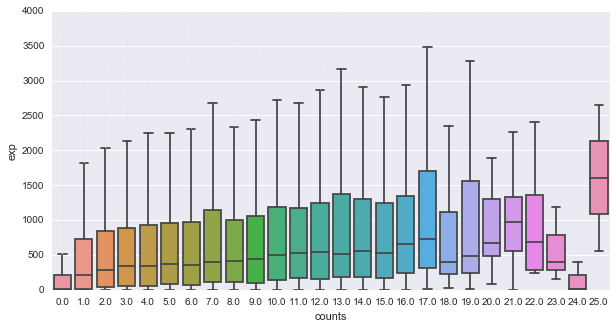

In [75]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
flierprops = dict(markerfacecolor='0.90', markersize=1, linestyle='none')
sns.boxplot(x='counts', y='exp', data=merged[merged['exp']<4000], flierprops=flierprops)

[None]

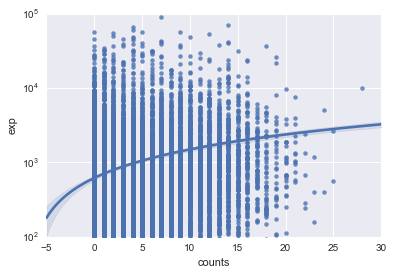

In [89]:
ax = sns.regplot(x='counts', y='exp', data=merged[merged['exp']<100000])
ax.set(yscale="log")

In [42]:
count_samp = pd.DataFrame(counts[samp]).sample(n=8)
exp_samp = pd.DataFrame(exp[samp]).ix[count_samp.index]

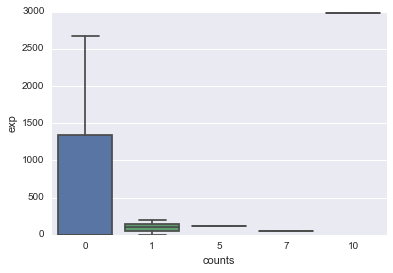

In [55]:
merged = count_samp.merge(exp_samp, left_index=True, right_index=True)
merged.columns = ['counts', 'exp']
sns.boxplot(x='counts', y='exp', data=merged)

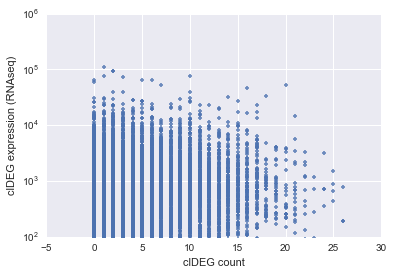

In [12]:
%matplotlib inline
samp = np.random.choice(counts.columns)
x, y = pd.Series(counts[samp], name="clDEG count"), pd.Series(exp[samp], name="clDEG expression (RNAseq)")
ax = sns.regplot(x=x, y=y, marker="+", fit_reg=False)
ax.set(yscale="log")
plt.savefig('cnt_exp_'+samp)
# exp[samp]

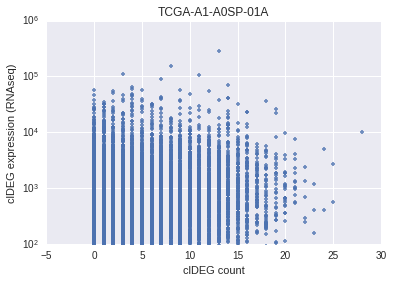

In [23]:
%matplotlib inline
samp = 'TCGA-A1-A0SP-01A'  # from random sample of sample column headings
x, y = pd.Series(counts[samp], name="clDEG count"), pd.Series(exp[samp], name="clDEG expression (RNAseq)")
ax = sns.regplot(x=x, y=y, marker="+", fit_reg=False)
ax.set(yscale="log")
plt.title(samp)
# exp[samp]

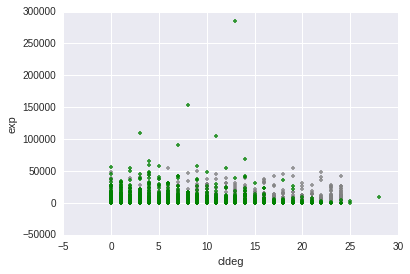

In [64]:
%matplotlib inline


# dfr_exp = pd.DataFrame(exp[samp])
# dfr_exp
# dfr_cnt = pd.DataFrame(counts[samp])
# dfr_cnt

df_r = pd.DataFrame(exp[samp]).merge(pd.DataFrame(counts[samp]), left_index=True, right_index=True)
df_r.columns = ['exp','cldeg']
df_r['status'] = 'real'

df_n = pd.DataFrame(exp[samp]).merge(pd.DataFrame(counts[samp]), left_index=True, right_index=True)
df_n.columns = ['exp','cldeg']
df_n['status'] = 'null'
df_n['cldeg'] = np.random.randint(0, 25, size=df_n.shape[0])
# df_n['exp'] = np.random.permutation(df_n['exp'])
df_n = df_n[df_n['exp'] < 55000]


ax = sns.regplot(x=pd.Series(df_n['cldeg']), y=df_n['exp'], marker="+", fit_reg=False, color='gray')
ax = sns.regplot(x=pd.Series(df_r['cldeg']), y=df_r['exp'], marker="+", fit_reg=False, color='green')
# ax.set(yscale="log")
# plt.title(samp)

[None]

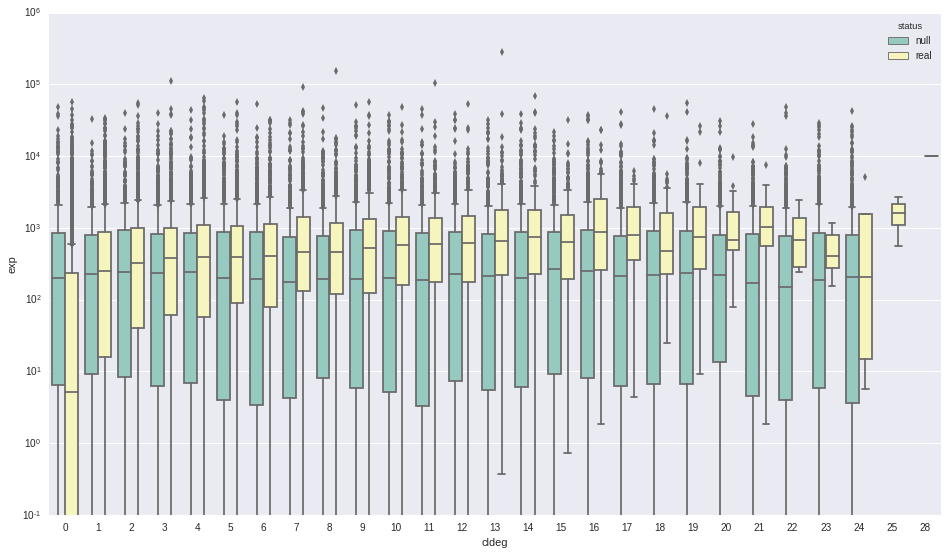

In [69]:
dims = (16,9)
fig, ax = plt.subplots(figsize=dims)

df_cat = pd.concat([df_n, df_r])
df_cat.head()
ax = sns.boxplot(x="cldeg", y="exp", hue="status", data=df_cat, palette="Set3")
ax.set(yscale="log")

In [74]:
df_cat[(df_cat['cldeg'] > 23) & (df_cat['status'] == 'real')].sort_values(by='exp', ascending=False)

,exp,cldeg,status
gene_id,,,
FOXM1,10027.200195,28,real
ZC3H15,5063.120117,24,real
DLGAP4,2655.969971,25,real
PAK1IP1,559.284973,25,real
SLC9A6,401.312988,24,real
UBXN10,17.876699,24,real
PRICKLE4,5.651200,24,real


In [52]:
np.random.randint(0, 25, size=df_n.shape[0])

array([15,  9,  6, 18, 21])

In [40]:
df_r.head(3)

,exp,cldeg,status
gene_id,,,
A1BG,36.774899,0,real
A1CF,0.000000,1,real
A2BP1,0.000000,0,real


In [51]:
df_n.head(3)

,exp,cldeg,status
gene_id,,,
A1BG,36.774899,2,null
A1CF,0.000000,2,null
A2BP1,0.000000,2,null


,TCGA-A1-A0SP-01A
gene_id,
A1BG,0
A1CF,1
A2BP1,0
A2LD1,4
A2M,2
A2ML1,8
A4GALT,0
A4GNT,0
AAA1,0


,counts,exp
gene_id,,
A1BG,0,36.774899
A1CF,1,0.000000
A2BP1,0,0.000000
A2LD1,4,64.294098
A2M,2,5247.580078
A2ML1,8,853.703003
A4GALT,0,775.629028
A4GNT,0,2.189000
AAA1,0,3.283500


In [54]:
cc = pd.DataFrame(counts[counts > 15][samp].dropna())
cc.columns = ['clDEG_count']

ce = pd.DataFrame(exp[samp])
ce.columns = ['clDEG_exp']

df = pd.concat([cc,ce], axis=1).dropna(axis=0)
df['clDEG_exp_log'] = np.log(df['clDEG_exp'])

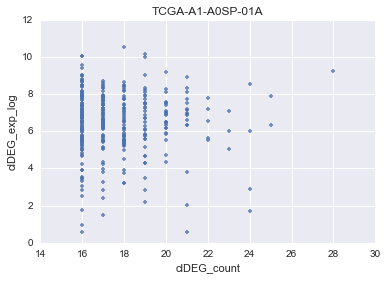

In [59]:
%matplotlib inline
samp = 'TCGA-A1-A0SP-01A'
pd.DataFrame(counts[counts > 15][samp].dropna())
ax = sns.regplot(x=df['clDEG_count'], y=df['clDEG_exp_log'], marker="+", fit_reg=False)
plt.title(samp)

In [60]:
df.sort_values(['clDEG_count', 'clDEG_exp_log'], ascending=[False, False])

,clDEG_count,clDEG_exp,clDEG_exp_log
FOXM1,28.0,10027.200195,9.213057
DLGAP4,25.0,2655.969971,7.884565
PAK1IP1,25.0,559.284973,6.326659
ZC3H15,24.0,5063.120117,8.529738
SLC9A6,24.0,401.312988,5.994742
UBXN10,24.0,17.876699,2.883498
PRICKLE4,24.0,5.651200,1.731868
DNMT3A,23.0,1183.510010,7.076240
BLM,23.0,402.042999,5.996559
CYB5D2,23.0,156.876999,5.055462


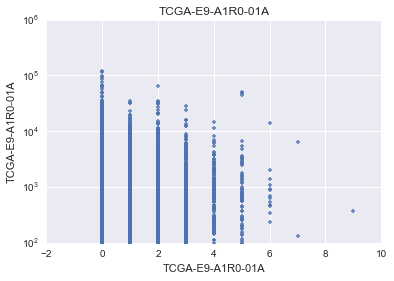

In [26]:
%matplotlib inline
samp = np.random.choice(counts.columns)
x, y = pd.Series(counts[samp], name="clDEG expression (RNAseq)"), pd.Series(exp[samp], name="clDEG count")
ax = sns.regplot(x=counts[samp], y=exp[samp], marker="+", fit_reg=False)
ax.set(yscale="log")""
plt.title(samp)
# exp[samp]

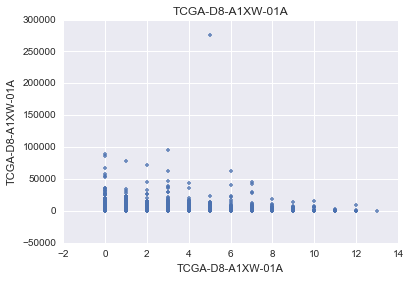

In [23]:
%matplotlib inline
samp = np.random.choice(counts.columns)
x, y = pd.Series(counts[samp], name="clDEG expression (RNAseq)"), pd.Series(exp[samp], name="clDEG count")
sns.regplot(x=counts[samp], y=exp[samp], marker="+", fit_reg=False)
plt.title(samp)
# exp[samp]

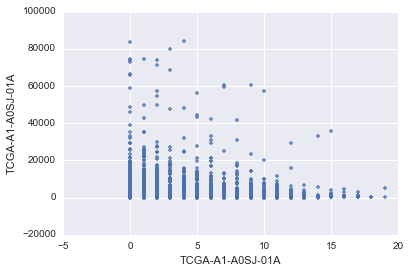

In [21]:
%matplotlib inline
samp = np.random.choice(counts.columns)
sns.regplot(x=counts[samp], y=exp[samp], marker="+", fit_reg=False)
# exp[samp]

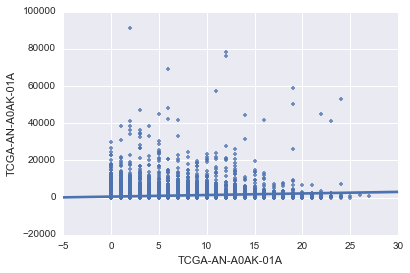

In [20]:
%matplotlib inline
# samps = np.array(set(counts.columns).intersection(exp.columns))                                    
samp = np.random.choice(counts.columns)
sns.regplot(x=counts[samp], y=exp[samp], marker="+", fit_reg=False)
# exp[samp]

## plot all clDEGs together

In [5]:
counts.head()

,TCGA-AR-A24V-01A,TCGA-A7-A26H-01A,TCGA-EW-A6SB-01A,TCGA-C8-A137-01A,TCGA-S3-A6ZG-01A,TCGA-BH-A42T-01A,TCGA-OL-A5RU-01A,TCGA-AQ-A54N-01A,TCGA-AO-A0J3-01A,TCGA-A7-A5ZV-01A,...,TCGA-BH-A18L-01A,TCGA-AO-A1KT-01A,TCGA-AR-A24S-01A,TCGA-AO-A1KS-01A,TCGA-GM-A3XN-01A,TCGA-A2-A25E-01A,TCGA-E2-A15O-01A,TCGA-AR-A5QP-01A,TCGA-E9-A24A-01A,TCGA-AN-A0FJ-01A
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,1,1,0,1,0,2,2,0,...,0,0,2,0,0,1,0,0,0,2
A2BP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,2,2,4,3,0,1,0,4,3,0,...,0,1,3,1,0,1,0,0,0,3
A2M,0,0,2,0,1,1,0,2,2,0,...,1,0,2,1,1,0,1,1,1,2


In [9]:
exp.head()

,TCGA-AR-A24V-01A,TCGA-A7-A26H-01A,TCGA-EW-A6SB-01A,TCGA-C8-A137-01A,TCGA-S3-A6ZG-01A,TCGA-BH-A42T-01A,TCGA-OL-A5RU-01A,TCGA-AQ-A54N-01A,TCGA-AO-A0J3-01A,TCGA-A7-A5ZV-01A,...,TCGA-BH-A18L-01A,TCGA-AO-A1KT-01A,TCGA-AR-A24S-01A,TCGA-AO-A1KS-01A,TCGA-GM-A3XN-01A,TCGA-A2-A25E-01A,TCGA-E2-A15O-01A,TCGA-AR-A5QP-01A,TCGA-E9-A24A-01A,TCGA-AN-A0FJ-01A
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,160.852997,149.770004,163.533997,137.014999,160.686996,280.829010,256.734009,429.864014,194.414993,40.602001,...,180.662003,165.445007,63.952801,60.428001,324.662994,81.641502,121.614998,261.440002,64.337097,60.023998
A1CF,0.000000,0.000000,0.000000,0.000000,0.935500,0.318700,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.314500,0.000000,0.000000,0.000000,0.000000
A2BP1,0.000000,0.522200,0.626600,0.000000,0.311800,1.593500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.172500,0.000000,1.064600,0.000000,0.000000,0.801900,0.599900,0.000000
A2LD1,82.804901,45.537899,145.031006,45.570900,63.940498,236.802994,116.786003,42.429901,71.932404,91.704697,...,36.791901,65.598297,68.636902,144.449997,87.022697,195.462006,47.709900,104.935997,121.290001,25.468201
A2M,9720.360352,9177.509766,32598.300781,6016.450195,6937.560059,6818.549805,9627.209961,4456.910156,4118.600098,65120.300781,...,6745.640137,9802.400391,22351.199219,11430.900391,18006.599609,12153.099609,6863.029785,9325.559570,13799.299805,9939.320312


In [ ]:
%matplotlib inline
for samp in counts.columns:
    pd.DataFrame(counts[counts > 15][samp].dropna())
    ax = sns.regplot(x=df['clDEG_count'], y=df['clDEG_exp_log'], marker="+", fit_reg=False)
plt.title(samp)

### cluster brca tcga cloves

In [66]:
cloves.head()

,exp,cnv,pos_n,neg_n,pos_mu,neg_mu,pos_var,neg_var,cohens_d,np_t_w,np_p_w,np_t_w_null,t_shrnk_glob,gene_var_exp
0,LMO1,GPR155,232,834,12.530776,5.901496,3029.498608,536.740912,0.201603,2.716095,6.712758e-03,1.327989,0.027931,1087.758133
1,LMO1,ZNF410,348,718,11.314833,5.419813,1441.584296,903.406113,0.179286,2.744862,6.155546e-03,-0.108123,0.028226,1087.758133
4,LMO1,GPNMB,110,956,17.144482,6.216627,3939.304859,746.190785,0.332877,3.306214,9.772521e-04,2.954829,0.033941,1087.758133
9,LMO1,SNHG4,226,840,19.542039,4.062485,3767.091296,314.794458,0.478011,6.379010,2.653610e-10,0.061503,0.064600,1087.758133
16,LMO1,SLC36A2,234,832,17.874875,4.382533,3584.761603,344.207780,0.414897,5.607011,2.622458e-08,0.375630,0.057022,1087.758133


In [67]:
cloves['pair'] = cloves['exp'] + cloves['cnv']

In [68]:
print('total shape', cloves.shape)
print('duplicate pairs shape', cloves[cloves.duplicated('pair')]['pair'].shape)
dupes = pd.DataFrame(cloves[cloves.duplicated('pair')]['pair'].value_counts())
cloves = pd.DataFrame(cloves[~cloves.duplicated('pair')])
print('df shape sans duplicates', cloves.shape)

total shape (243673, 15)
duplicate pairs shape (268,)
df shape sans duplicates (243405, 15)


In [69]:
cloves = cloves[cloves['np_p_w'] < 0.01]

In [70]:
to_piv = cloves[['exp','cnv','np_t_w']]
to_piv.head()

,exp,cnv,np_t_w
0,LMO1,GPR155,2.716095
1,LMO1,ZNF410,2.744862
4,LMO1,GPNMB,3.306214
9,LMO1,SNHG4,6.379010
16,LMO1,SLC36A2,5.607011


In [71]:
cpiv = to_piv.pivot(index='exp', columns='cnv', values='np_t_w')

In [74]:
cpiv[cpiv['sum']==0]

cnv,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,hsa-mir-664,hsa-mir-720,hsa-mir-886,hsa-mir-887,hsa-mir-924,hsa-mir-941-2,hsa-mir-941-3,hsa-mir-95,hsa-mir-96,sum
exp,,,,,,,,,,,,,,,,,,,,,


In [73]:
cpiv['sum'] = cpiv.sum(axis=1)
cpiv.sort_values('sum', ascending=False)

cnv,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,hsa-mir-664,hsa-mir-720,hsa-mir-886,hsa-mir-887,hsa-mir-924,hsa-mir-941-2,hsa-mir-941-3,hsa-mir-95,hsa-mir-96,sum
exp,,,,,,,,,,,,,,,,,,,,,
GTPBP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390.725108
GINS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370.206010
TPX2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,356.975444
TROAP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.446894
FOXM1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,339.728353
H2AFZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.810791
MELK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325.413985
CENPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.216434
CDK1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.986557


exp
A1BG          -0.154418
A1CF          24.438288
A2LD1         -9.539825
A2M            3.510145
A2ML1         75.199428
A4GALT        -3.956071
AAA1           3.048942
AAAS         -37.260045
AACS          -2.376921
AADAC         11.927919
AADACL3        2.621962
AADAT         55.627892
AAGAB        -79.845627
AAK1         -14.492337
AAMP         -20.185088
AANAT          8.623601
AARS         160.762096
AARS2         34.440772
AARSD1        -3.260614
AASDH        -15.761497
AASDHPPT       5.803986
AASS        -239.611364
AATF          62.999568
AATK         -38.870810
ABAT        -109.980365
ABCA1         -2.623386
ABCA10      -128.390847
ABCA11P      -51.643090
ABCA12         9.353983
ABCA13        87.801516
                ...    
ZSCAN18      -53.216525
ZSCAN2         6.692235
ZSCAN20      -14.082389
ZSCAN21       -8.826229
ZSCAN22       46.115697
ZSCAN23      -20.638648
ZSCAN29      -56.374889
ZSCAN4         3.760921
ZSCAN5A       81.122147
ZSCAN5B       30.382900
ZSWIM1      

In [12]:
cpiv.to_csv('brca_1M_clove_pivot.tab.gz', sep='\t', compression='gzip')
# cpiv = pd.read_csv('brca_1M_clove_pivot.tab.gz', sep='\t', compression='gzip', index_col=0)

In [14]:
print('drop cpiv rows with all nan', cpiv.dropna(how='all').shape)
print('full cpiv', cpiv.shape)

MemoryError: 

MemoryError: 

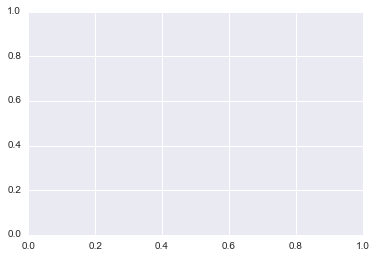

In [13]:
%matplotlib inline
sns.heatmap(cpiv)

### cluster sandbox

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import pandas as pd
import numpy as np

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

 

In [2]:
cpiv = pd.read_csv('brca_1M_clove_pivot.tab.gz', sep='\t', compression='gzip', index_col=0)

In [3]:
cpiv.to_csv('brca_1M_clove_pivot.tab', sep='\t')

In [84]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [82]:
pd.read_csv?

In [1]:
cpiv.head()

NameError: name 'cpiv' is not defined

In [89]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [90]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## k means

In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

import pandas as pd
import numpy as np


 

In [78]:
iris = datasets.load_iris()

In [84]:
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [88]:
x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
model = KMeans(n_clusters=3)
model.fit(x)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [90]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## hirearchical clustering

In [106]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [98]:
data_np = np.genfromtxt("ExpRawData-E-TABM-84-A-AFFY-44.tab.txt",names=True,usecols=tuple(range(1,30)),dtype=float, delimiter="\t")
data_df = pd.read_csv('ExpRawData-E-TABM-84-A-AFFY-44.tab.txt', sep='\t')
data_array = data.view((np.float, len(data.dtype.names)))
data_array = data_array.transpose()

In [102]:
del data_df['DesignElementAccession']

In [103]:
data_dfT = data_df.T

In [104]:
data_array

array([[  6.3739767,   5.986182 ,   7.468118 , ...,  11.745089 ,
         13.277803 ,  13.067169 ],
       [  6.4981704,   4.861167 ,   6.9479957, ...,  11.33983  ,
         13.031992 ,  12.7244425],
       [  6.271771 ,   5.5666986,   6.9435835, ...,  11.840397 ,
         13.332481 ,  13.051369 ],
       ..., 
       [  6.112102 ,   5.0324726,   6.93343  , ...,  11.411251 ,
         13.084589 ,  12.768577 ],
       [  6.359853 ,   6.12955  ,   8.460821 , ...,  10.814936 ,
         12.888793 ,  12.673793 ],
       [  6.010906 ,   5.4538217,   6.8208113, ...,  11.467866 ,
         13.08952  ,  12.792053 ]])

In [105]:
data_dfT.head()

,0,1,2,3,4,5,6,7,8,9,...,54664,54665,54666,54667,54668,54669,54670,54671,54672,54673
r14,6.373977,5.986182,7.468118,4.495150,6.474134,6.566102,5.504439,4.110208,5.193701,6.694192,...,4.432037,8.819593,8.604948,8.756401,10.130124,9.921198,12.025104,11.745089,13.277803,13.067169
h45,6.498170,4.861167,6.947996,4.485995,5.935137,5.881393,4.729975,3.572728,5.522659,6.667221,...,3.504612,8.095693,7.934677,7.989785,9.596786,9.250914,11.671002,11.339830,13.031992,12.724443
c11,6.271771,5.566699,6.943584,3.671166,6.053127,6.637986,5.056204,3.628470,5.280843,6.683689,...,3.648392,8.704434,8.530185,8.392772,10.297174,9.819334,12.152436,11.840397,13.332481,13.051369
r11,6.092041,5.590227,7.536698,3.934822,6.626716,6.457661,5.700056,4.170602,5.128692,6.986097,...,4.366417,8.656130,8.202249,8.651256,10.013320,9.740578,11.883470,11.565059,13.155771,12.922771
c07,6.095927,5.442939,6.891398,3.731431,6.047488,6.404971,5.220928,4.337219,5.345705,6.697884,...,3.991167,8.532474,8.324046,8.307407,10.107987,9.759665,11.949602,11.727728,13.297636,12.993076


In [115]:
data_dfT.shape

(31, 54674)

In [112]:
data_dist = pdist(data_array) # computing the distance
data_link = linkage(data_dist) # computing the linkage

In [117]:
data_link

array([[   9.        ,   26.        ,   67.05554986,    2.        ],
       [  15.        ,   22.        ,   68.8341528 ,    2.        ],
       [  14.        ,   29.        ,   69.68597506,    3.        ],
       [   8.        ,   31.        ,   70.67534715,    4.        ],
       [  18.        ,   27.        ,   72.08619669,    2.        ],
       [   5.        ,   32.        ,   72.26640672,    5.        ],
       [  25.        ,   34.        ,   72.80878081,    6.        ],
       [   1.        ,   35.        ,   73.06083245,    7.        ],
       [  23.        ,   36.        ,   73.16465033,    8.        ],
       [  21.        ,   24.        ,   77.01187887,    2.        ],
       [  10.        ,   37.        ,   78.23010509,    9.        ],
       [  33.        ,   38.        ,   81.33675695,    4.        ],
       [   4.        ,    7.        ,   84.475591  ,    2.        ],
       [  12.        ,   41.        ,   84.47741709,    3.        ],
       [  28.        ,   39.      

In [118]:
data_dist = pdist(data_dfT) # computing the distance
data_link = linkage(data_dist) # computing the linkage

In [120]:
data_link

array([[   9.        ,   26.        ,   67.05554986,    2.        ],
       [  15.        ,   22.        ,   68.8341528 ,    2.        ],
       [  14.        ,   31.        ,   69.68597506,    3.        ],
       [   8.        ,   33.        ,   70.67534715,    4.        ],
       [  18.        ,   27.        ,   72.08619669,    2.        ],
       [   5.        ,   34.        ,   72.26640672,    5.        ],
       [  25.        ,   36.        ,   72.80878081,    6.        ],
       [   1.        ,   37.        ,   73.06083245,    7.        ],
       [  23.        ,   38.        ,   73.16465033,    8.        ],
       [  21.        ,   24.        ,   77.01187887,    2.        ],
       [  10.        ,   39.        ,   78.23010509,    9.        ],
       [   4.        ,   30.        ,   78.73256001,    2.        ],
       [   7.        ,   42.        ,   81.28457075,    3.        ],
       [  35.        ,   40.        ,   81.33675695,    4.        ],
       [  12.        ,   43.      

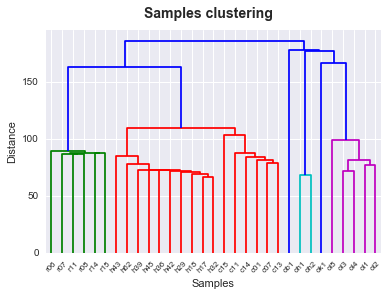

In [123]:
dendrogram(data_link, labels=data_dfT.index)  # labels=data.dtype.names
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Samples clustering', fontweight='bold', fontsize=14)

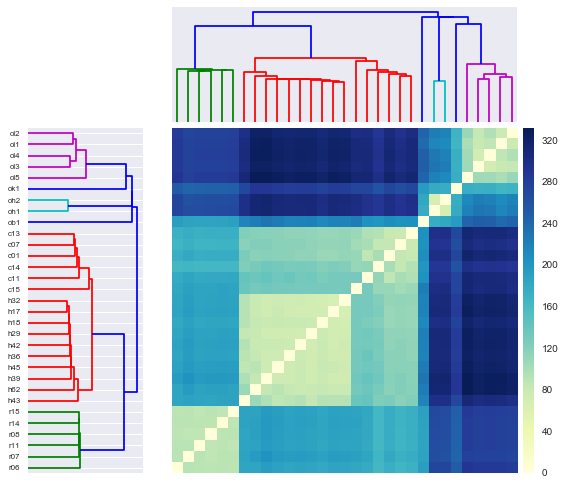

In [124]:
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right',labels=data_dfT.index) # adding/removing the axes, data.dtype.names
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

In [77]:
-

In [78]:
hire_clust(data_df, "fig_test")

NameError: name 'data_df' is not defined

In [138]:
cpiv.shape

(18301, 24752)

In [139]:
hire_clust(cpiv, "cpiv_dendroheat_complete")

MemoryError: 

# prep for GSEA preranked

In [27]:
counts = pd.read_csv('brca_het_clDEG_count.tab.gz', sep='\t', compression='gzip', index_col='gene_id')

In [28]:
counts.head()

,TCGA-AR-A24V-01A,TCGA-A7-A26H-01A,TCGA-EW-A6SB-01A,TCGA-C8-A137-01A,TCGA-S3-A6ZG-01A,TCGA-BH-A42T-01A,TCGA-OL-A5RU-01A,TCGA-AQ-A54N-01A,TCGA-AO-A0J3-01A,TCGA-A7-A5ZV-01A,...,TCGA-BH-A18L-01A,TCGA-AO-A1KT-01A,TCGA-AR-A24S-01A,TCGA-AO-A1KS-01A,TCGA-GM-A3XN-01A,TCGA-A2-A25E-01A,TCGA-E2-A15O-01A,TCGA-AR-A5QP-01A,TCGA-E9-A24A-01A,TCGA-AN-A0FJ-01A
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,1,1,0,1,0,2,2,0,...,0,0,2,0,0,1,0,0,0,2
A2BP1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,2,2,4,3,0,1,0,4,3,0,...,0,1,3,1,0,1,0,0,0,3
A2M,0,0,2,0,1,1,0,2,2,0,...,1,0,2,1,1,0,1,1,1,2


In [35]:
counts.sum(axis=1).to_csv('brca_het_clDEG_count_sum.rnk', sep='\t', header=False)
counts.mean(axis=1).to_csv('brca_het_clDEG_count_mean.rnk', sep='\t', header=False)

In [34]:
counts.sum(axis=1)

gene_id
A1BG            0
A1CF          549
A2BP1           0
A2LD1        1545
A2M           849
A2ML1        4031
A4GALT        493
A4GNT           0
AAA1            0
AAAS         2942
AACS         2447
AACSL           0
AADAC         151
AADACL2         0
AADACL3         0
AADACL4         0
AADAT        2431
AAGAB        3802
AAK1          154
AAMP          729
AANAT           0
AARS        10770
AARS2        3152
AARSD1        358
AASDH         620
AASDHPPT     1038
AASS        10675
AATF         3462
AATK         1563
ABAT         4772
            ...  
ZSCAN16      3303
ZSCAN18      5280
ZSCAN20       857
ZSCAN21       232
ZSCAN22      2173
ZSCAN23       314
ZSCAN2       1293
ZSCAN29      3560
ZSCAN4        149
ZSCAN5A      6930
ZSCAN5B      1392
ZSWIM1       3514
ZSWIM2          0
ZSWIM3       4049
ZSWIM4       4978
ZSWIM5       3030
ZSWIM6       2119
ZSWIM7       2342
ZUFSP        7945
ZW10         8304
ZWILCH       7804
ZWINT        9296
ZXDA         2457
ZXDB         2297
ZX

## tcga comparison to synlethdb

In [2]:
import pandas as pd

In [4]:
syndb = pd.read_pickle('data/synlethdb_sl_human.pickle')
syndb.head()

,GeneASymbol,GeneAid,GeneBSymbol,GeneBid,PubmedID,Evidence,Type,Species,DiseaseScore
19837,BRCA1,672,PARP1,142,15829967;3965078;20832020;23370117;23564760;24...,Synlethality;Decipher;Text Mining,SL,"Human breast cancer;A549,PC3,MDA468;breast can...",0.99
19950,RB1,5925,SKP2,6502,20505340,Synlethality,SL,Human cancer,0.90
19949,PRKAA1,5562,TP53,7157,17638885,Synlethality,SL,Human colorectal cancer,0.90
19948,BIRC5,332,HRAS,3265,12833149,Synlethality,SL,Human cancer,0.90
19947,MTOR,2475,PTEN,5728,11504908,Synlethality,SL,Human cancer,0.90


## avana comparison to synlethdb

In [5]:
avana = pd.read_csv('data/avana_gene_dependency.tab.gz', compression='gzip', sep='\t', index_col=0)
avana.columns = [x.split(' ')[0] for x in avana.columns]
avana = avana.T
avana.columns = [x.split('_')[0] for x in avana.columns]
avana = avana.T

In [6]:
avana.set_index('GeneBSymbol')

KeyError: 'GeneBSymbol'

## Compute Null TCGA BRCA cloves

In [21]:
brca_cnv_het = pd.read_csv('data/brca_cnv_het.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_cnv_het.tab.gz'
brca_exp = pd.read_csv('data/brca_exp.tab.gz', sep='\t', compression='gzip', index_col='gene_id') # 'tcga/brca_exp.tab.gz'
nulls = randomPairContextStat(n_samp=100000, expdf=brca_exp, cnvdf=brca_cnv_het, permute=True)

In [ ]:
nulls.sort_values(by='np_t_w', ascending=False)